In [1]:
#spacy tokenizer

import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [2]:
import pandas as pd

combinedFile = "csvs/combined_csv.csv"

df = pd.read_csv(combinedFile, delimiter=',', header=0)
print('Number of titles: {:,}\n'.format(df.shape[0]))
df.sample(3)

Number of titles: 2,973



,year,congress,title,abstract,link,tags
1007,2005,22C3,Have you hugged your Mac today? - Ein audiovis...,Live-Performance der HĂśrspielwerkstatt der Hu...,http://events.ccc.de/congress/2005/fahrplan/ev...,NaN
1563,2010,27C3,Logikschaltungen ohne Elektronik: logische Sch...,Ein kurzer Anfängerz über mechanische und strö...,https://events.ccc.de/congress/2010/Fahrplan/s...,NaN
1463,2009,26C3,Privacy & Stylometry: Practical attackz Agains...,Authorship recognition based on linguistics (k...,https://events.ccc.de/congress/2009/Fahrplan/s...,NaN


In [3]:
#reading titles 

title_dict = {}

# classify that the article has recommends
for i in range(len(df)):
    if df["title"][i] in title_dict.keys():
        title_dict[df["title"][i]] += 1
    else:
        title_dict.setdefault(df["title"][i], 1)

title_dict = [x for x in title_dict if str(x) != 'nan']

In [4]:
#titles text
import re
title_text = " ".join(x for x in title_dict)

title_text = re.sub('[^a-zA-Z -\']+', '', title_text)
title_text = title_text.replace('>', ' ').replace('<', ' ')
title_text = re.sub(' +', ' ', title_text)
title_text = title_text.replace('hackz', 'hack').replace('securityz', 'security').replace('attackz','attacks').replace('Anfngerz','')

In [5]:
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
de_stop = set(nltk.corpus.stopwords.words('german'))

def check_stop_lists(token):
    if token in en_stop or token in de_stop:
        return True
    else:
        return False
    
def check_length(token):
    if len(token) > 4:
        return True
    else:
        return False

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elhaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#title most frequent text
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 200000
doc = nlp(title_text)

#remove stopwords and punctuations
words = [token.text for token in doc if check_stop_lists(token.text.lower()) == False and check_length(token.text) == True and token.is_punct != True]
#nouns = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == "NOUN"]
#verbs = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == "VERB"]


word_freq = Counter(words)
common_words = word_freq.most_common(3)
print(common_words)

most_common_words=[]
for key, value in common_words:
    print(key)
    most_common_words.append(key)

#for w in most_common_words:
#    print(w)
    
# five most common noun tokens
#noun_freq = Counter(nouns)
#common_nouns = noun_freq.most_common(20)
#print (common_nouns)

# five most common verbs tokens
#verb_freq = Counter(verbs)
#common_verbs = verb_freq.most_common(20)
#print (common_verbs)

[('security', 152), ('Internet', 85), ('attacks', 54)]
security
Internet
attacks


In [7]:
years = df.year.unique()
print(type(years))
yearsList = []
for y in years:
    yearsList.append(str(y).replace('.0',''))
    
#for x in yearsList:
#    print(x)

<class 'numpy.ndarray'>


In [8]:
def getFrequencies(word,yearsList):
    yearsList.sort()
    frequencies=[]
    wordFreq = 0

    for year in yearsList:
        urlCSV = 'csvs/'+year+'.csv'
        #print(year)
        # load the data with pd.read_csv
        data = pd.read_csv(urlCSV, delimiter='|',error_bad_lines=False)
        #print(year, '  Number of titles: {:,}\n'.format(data.shape[0]))
        alltxt = data.title.str.lower()
        
        #data['abstract'].value_counts()

        freq = alltxt.str.split(expand=True).stack().value_counts()

        for name, val in freq.iteritems():
            if name.lower()==word.lower():
                wordFreq = val
        #print(word, wordFreq)
        frequencies.append(wordFreq)
    
    return frequencies

#for y in yearsList:
#    print(y)
#for x in frequencies:
#    print(x)

        


In [9]:
import matplotlib.pyplot as plt

def plotFrequencies(word,yearsList,frequencies):
    yearsList.sort()
    title_word = word+' Usage Over Years'
    fig = plt.figure()
    fig.suptitle(title_word, fontsize=10)
    plt.xlabel('Years', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.rcParams["figure.figsize"] = (10,2)

    plt.plot(yearsList, frequencies)
    # You can specify a rotation for the tick labels in degrees or with keywords.
    plt.xticks(yearsList, yearsList, rotation='vertical')

    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0,0.05)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.15)
    plt.show()



security


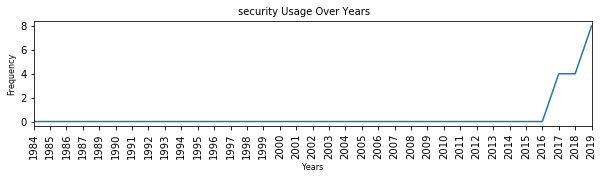

Internet


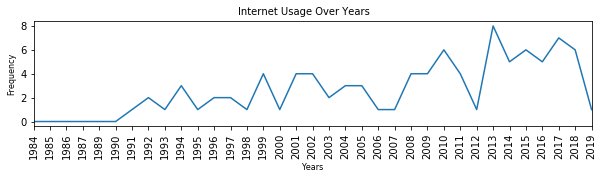

attacks


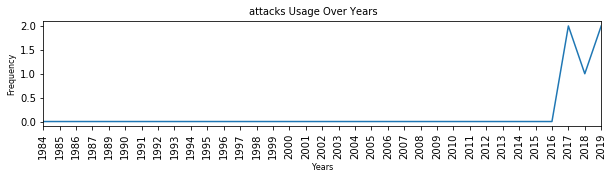

In [11]:
for key, value in common_words:
    print(key)
    plotFrequencies(key,yearsList,getFrequencies(key,yearsList))